In [497]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast

In [552]:
df = pd.read_csv('nuevos_datos.csv')

In [553]:
df = df.drop('Unnamed: 0',axis = 1)

Estructura y detalles del dataframe

In [554]:
df.shape

(27268, 9)

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27268 entries, 0 to 27267
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        27268 non-null  object 
 1   app_name      27268 non-null  object 
 2   release_date  27268 non-null  object 
 3   specs         27268 non-null  object 
 4   price         27268 non-null  float64
 5   early_access  27268 non-null  bool   
 6   sentiment     27268 non-null  object 
 7   metascore     27268 non-null  int64  
 8   año           27268 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 1.7+ MB


In [512]:
df.columns

Index(['genres', 'app_name', 'release_date', 'specs', 'price', 'early_access',
       'sentiment', 'metascore', 'año'],
      dtype='object')

Valores faltantes por columna

In [504]:
df.isna().sum() 

genres          0
app_name        0
release_date    0
specs           0
price           0
early_access    0
sentiment       0
metascore       0
año             0
dtype: int64

In [505]:
df.describe()

,price,metascore,año
count,27268.00000,27268.000000,27268.000000
mean,8.67009,6.633123,2014.859212
std,14.62703,21.117965,3.281337
min,0.00000,0.000000,1983.000000
25%,2.99000,0.000000,2014.000000
50%,4.99000,0.000000,2016.000000
75%,9.99000,0.000000,2017.000000
max,995.00000,96.000000,2021.000000


Hacemos una copia del dataframe original para trabajar sobre el mismo

In [555]:
df_eda = df.copy()

In [556]:
#Finalmente eliminamos los valores vacios en metascore
valores_finales = df_eda[df_eda["metascore"]==0].index
df_eda = df_eda.drop(valores_finales)

In [557]:
df_eda['sentiment'] = df_eda["sentiment"].astype('category')

In [558]:
df_eda.head()

,genres,app_name,release_date,specs,price,early_access,sentiment,metascore,año
20,['Action'],Half-Life,1998-11-08,"['Single-player', 'Multi-player', 'Valve Anti-...",9.99,False,Overwhelmingly Positive,96,1998
25,['Strategy'],Disciples II: Gallean's Return,2006-07-06,"['Single-player', 'Multi-player', 'Co-op']",6.99,False,Mostly Positive,84,2006
26,['Strategy'],Disciples II: Rise of the Elves,2006-07-06,"['Single-player', 'Multi-player', 'Co-op']",6.99,False,Very Positive,80,2006
27,"['Action', 'Indie', 'RPG']",The Ship: Murder Party,2006-07-11,"['Single-player', 'Multi-player', 'Steam Tradi...",9.99,False,Very Positive,76,2006
34,['Action'],Advent Rising,2005-08-09,"['Single-player', 'Steam Trading Cards']",9.99,False,Mostly Positive,70,2005


In [510]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2503 entries, 20 to 27258
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   genres        2503 non-null   object  
 1   app_name      2503 non-null   object  
 2   release_date  2503 non-null   object  
 3   specs         2503 non-null   object  
 4   price         2503 non-null   float64 
 5   early_access  2503 non-null   bool    
 6   sentiment     2503 non-null   category
 7   metascore     2503 non-null   int64   
 8   año           2503 non-null   int64   
dtypes: bool(1), category(1), float64(1), int64(2), object(4)
memory usage: 161.7+ KB


C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


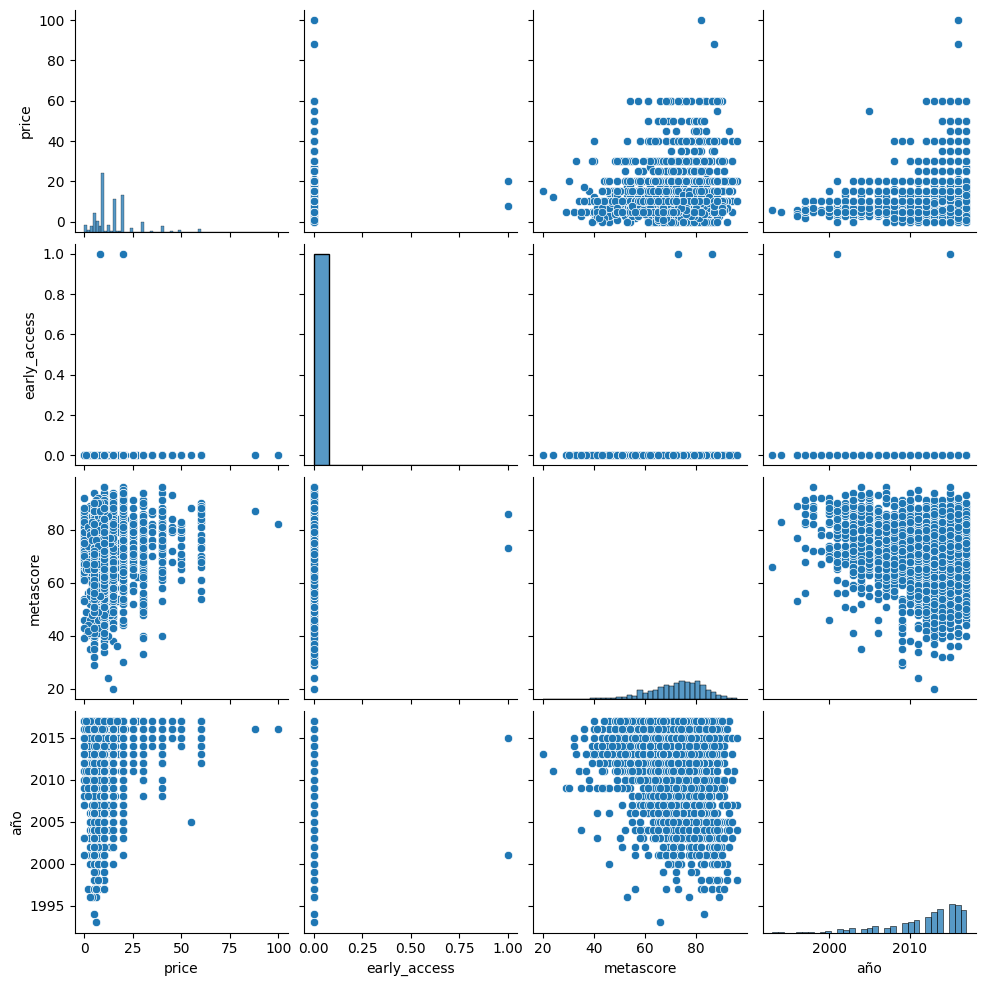

In [559]:
sns.pairplot(data=df_eda)
plt.show()

In [560]:
#Filtramos el df para los precios 
df_eda = df_eda[df_eda['price'] <= 100]

Histograma de frecuencia de la columna genres

In [561]:
df_eda['genres'] = df_eda['genres'].str.split(',')
# Hacemos lo mismo con specs
df_eda['specs'] = df_eda['specs'].str.split(',')

In [562]:
df_eda = df_eda.explode('genres')
df_eda = df_eda.explode('specs')

In [563]:
# Reseteamos los índices para no tener inconvenientes
df_eda = df_eda.reset_index(drop=True)

In [564]:
# Limpiamos la columna genres de los signos de puntuación que quedaron 
df_eda['genres'] = df_eda['genres'].str.extract(r"'(\w+)'")

In [565]:
clean_spec = lambda x: x.replace("[", "").replace("]", "").replace("'", "")
# Aplicamos la función lambda a la columna 'specs'
df_eda['specs'] = df_eda['specs'].apply(clean_spec)

In [566]:
df_eda['specs'] = df_eda['specs'].str.replace('-', ' ')

In [567]:
genre_frequency = df_eda['genres'].value_counts()

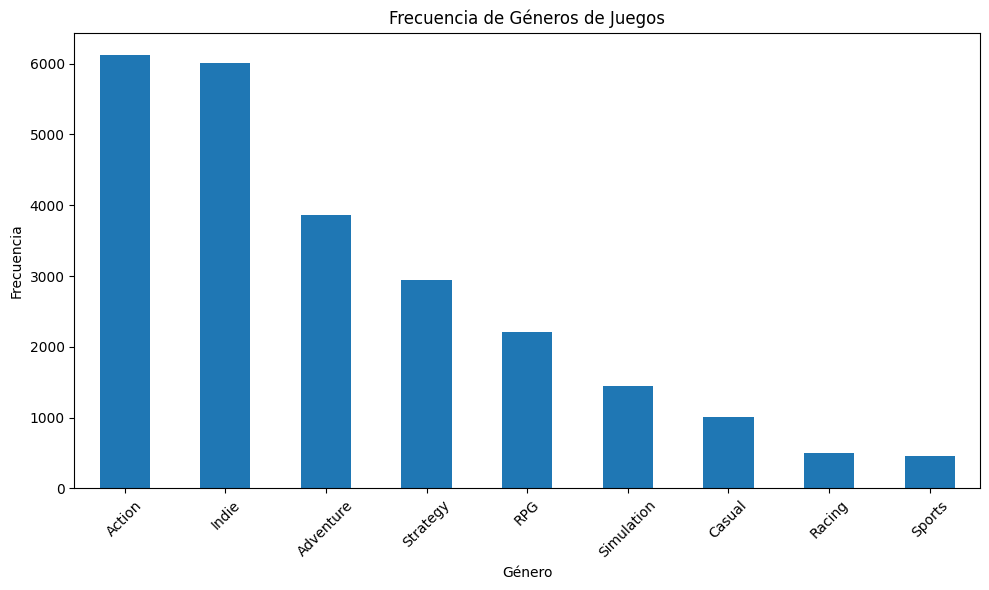

In [568]:
# Generar un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
genre_frequency.plot(kind='bar')  # Tipo de gráfico de barras
plt.title('Frecuencia de Géneros de Juegos')  # Título del gráfico
plt.xlabel('Género')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas en el eje x
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico

In [569]:
df_eda['app_name'].value_counts()

app_name
Freaky Awesome                                      72
BattleBlock Theater®                                64
SpeedRunners                                        60
Monaco: What's Yours Is Mine                        60
Hover                                               52
                                                    ..
Vampire: The Masquerade - Redemption                 1
BULLET SOUL INFINITE BURST - Original Soundtrack     1
Dragon Age: Origins                                  1
Dracula Origin                                       1
Back to the Future: The Game                         1
Name: count, Length: 2503, dtype: int64

In [571]:
specs_frequency = df_eda['specs'].value_counts()

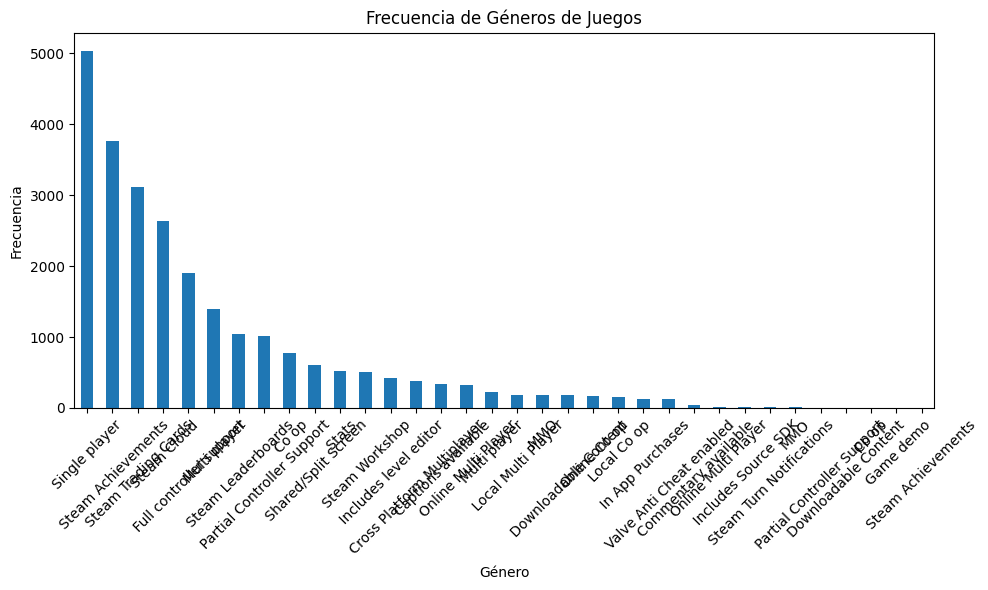

In [572]:
# Generar un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
specs_frequency.plot(kind='bar')  # Tipo de gráfico de barras
plt.title('Frecuencia de Géneros de Juegos')  # Título del gráfico
plt.xlabel('Género')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas en el eje x
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico

In [573]:
df_eda['early_access'].value_counts()

early_access
False    25149
True        69
Name: count, dtype: int64

In [574]:
df_eda['sentiment'].value_counts()

sentiment
Very Positive              11769
Mostly Positive             5144
Mixed                       4135
Overwhelmingly Positive     1848
Positive                    1071
Few Reviews                  639
Mostly Negative              359
unknown                      192
Negative                      30
Very Negative                 20
Overwhelmingly Negative       11
Name: count, dtype: int64

Histograma de precios

limpieza y analisis del dataframe a partir de df_eda

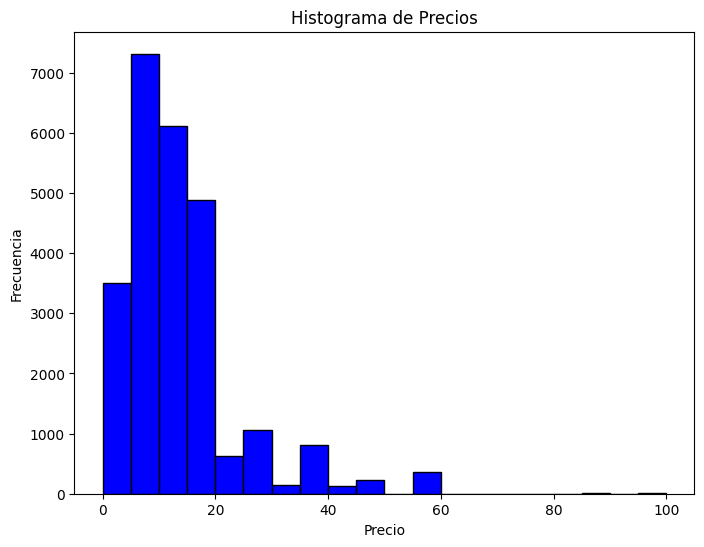

In [575]:
# Crear un histograma para la variable 'price'
plt.figure(figsize=(8, 6))
plt.hist(df_eda['price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

Histograma de metascore

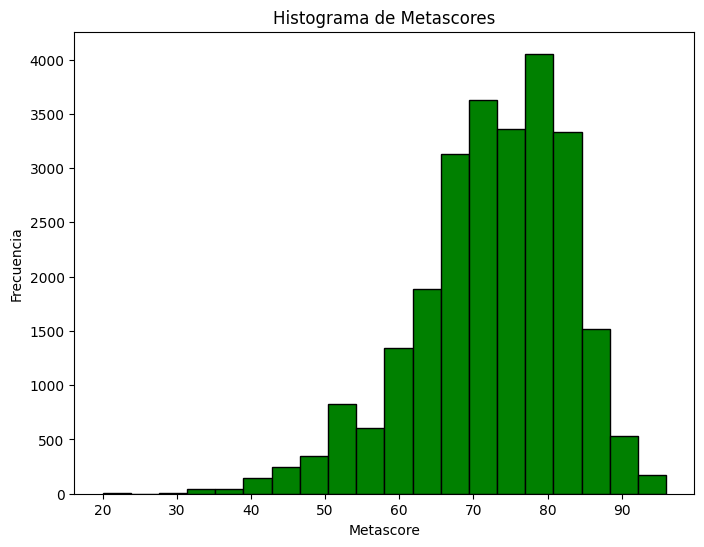

In [576]:
# Crear un histograma para la variable 'metascore'
plt.figure(figsize=(8, 6))
plt.hist(df_eda['metascore'], bins=20, color='green', edgecolor='black')
plt.xlabel('Metascore')
plt.ylabel('Frecuencia')
plt.title('Histograma de Metascores')
plt.show()

Grafico de densidad para price

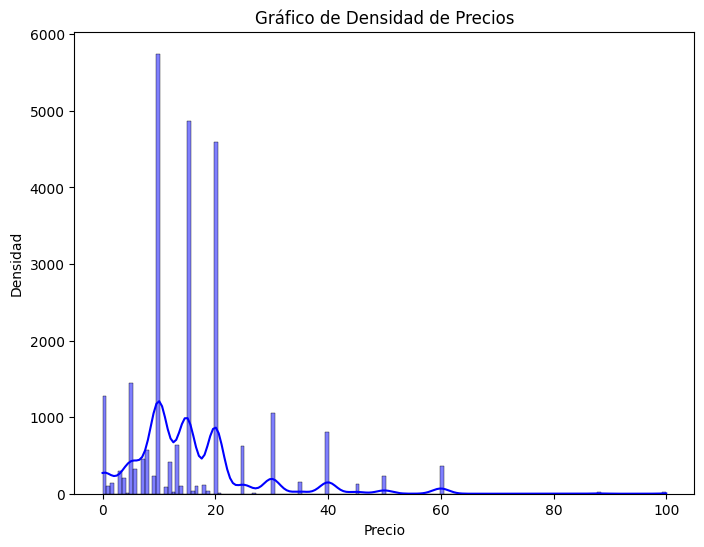

In [577]:
# Crear un gráfico de densidad para la variable 'price'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x='price', kde=True, color='blue')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Precios')
plt.show()

Grafico de densidad para metascore

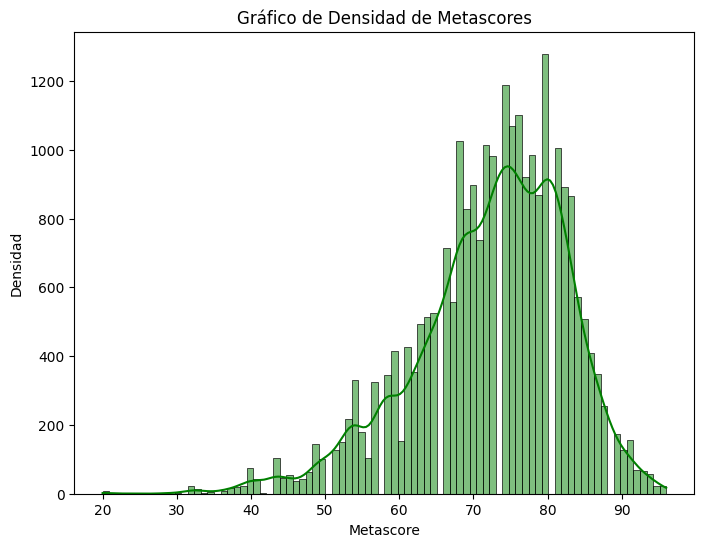

In [578]:
# Crear un gráfico de densidad para la variable 'metascore'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x='metascore', kde=True, color='green')
plt.xlabel('Metascore')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Metascores')
plt.show()

Valores atipicos en price

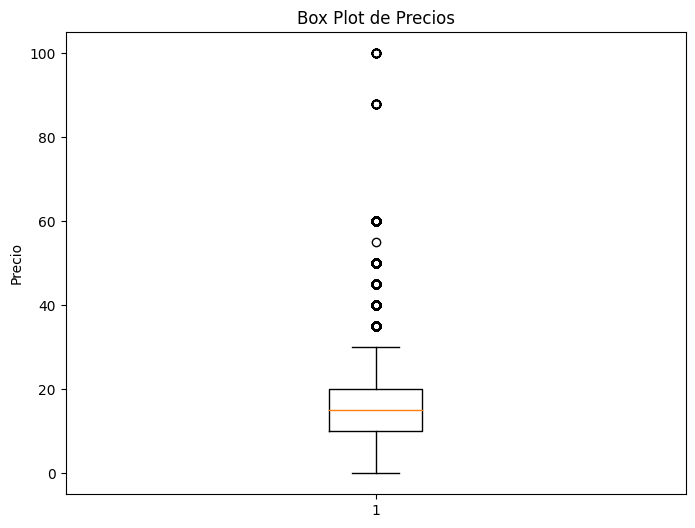

In [579]:
# Filtrar los datos de 'price' para valores menores a 100
filtered_prices = df_eda[df_eda['price'] < 100]['price']

# Crear un box plot para la variable 'price'
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_prices)
plt.ylabel('Precio')
plt.title('Box Plot de Precios')
plt.show()

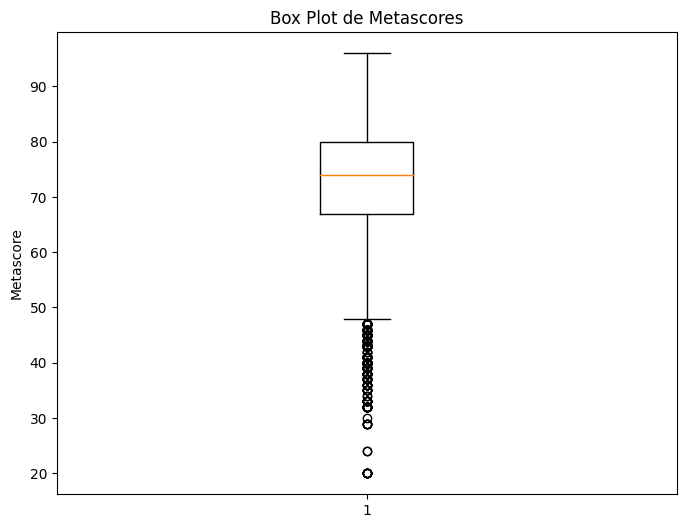

In [580]:
# Crear un box plot para la variable 'metascore'
plt.figure(figsize=(8, 6))
plt.boxplot(df_eda['metascore'])
plt.ylabel('Metascore')
plt.title('Box Plot de Metascores')
plt.show()

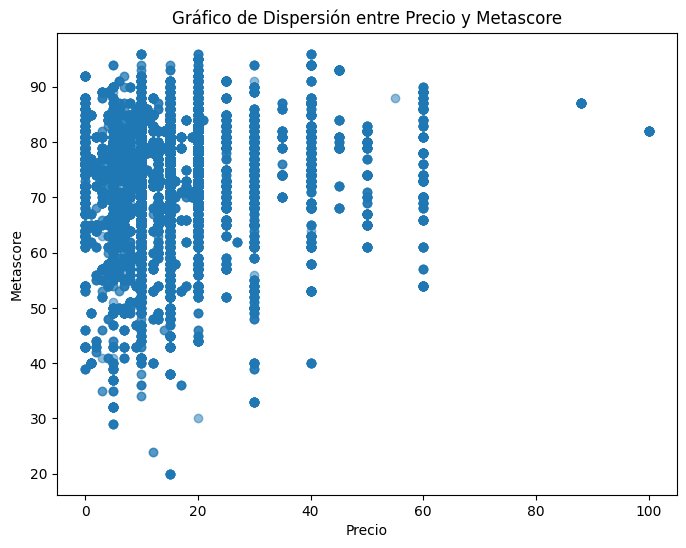

In [581]:
# Crear un gráfico de dispersión entre 'price' y 'metascore'
plt.figure(figsize=(8, 6))
plt.scatter(df_eda['price'], df_eda['metascore'], alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Metascore')
plt.title('Gráfico de Dispersión entre Precio y Metascore')
plt.show()

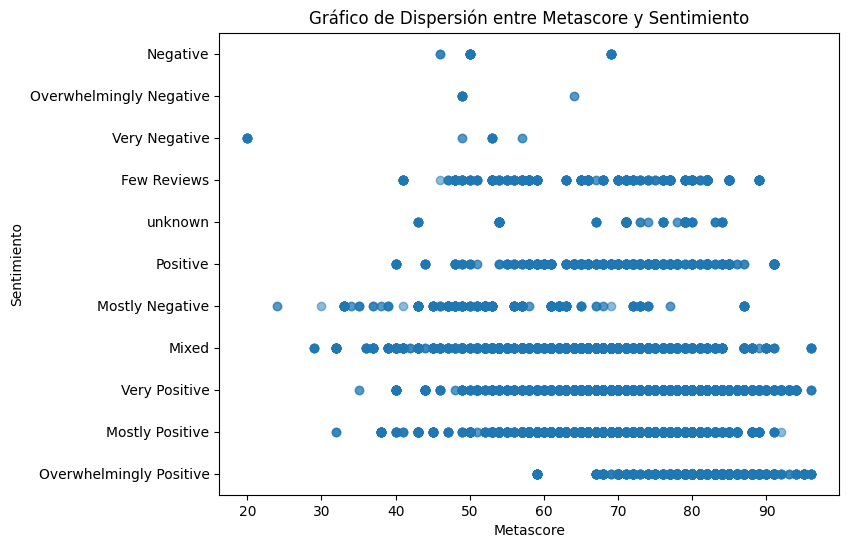

In [582]:
# Crear un gráfico de dispersión entre 'metascore' y 'sentiment' en el DataFrame filtrado
plt.figure(figsize=(8, 6))
plt.scatter(df_eda['metascore'], df_eda['sentiment'], alpha=0.5)
plt.xlabel('Metascore')
plt.ylabel('Sentimiento')
plt.title('Gráfico de Dispersión entre Metascore y Sentimiento')
plt.show()

In [536]:
from wordcloud import WordCloud

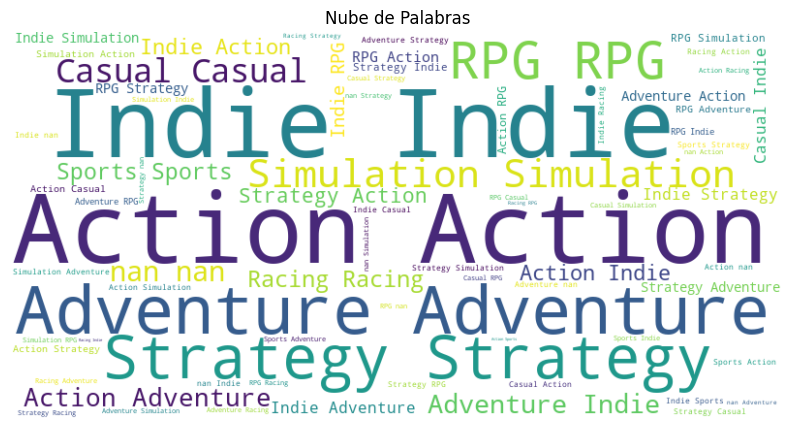

In [583]:
# Convertir los valores de la columna 'genres' a cadenas de texto
df_eda['genres'] = df_eda['genres'].astype(str)

# Crear una cadena de texto a partir de la columna 'genres'
text = ' '.join(df_eda['genres'])

# Crear un objeto WordCloud con las opciones deseadas
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras')
plt.axis('off')  # Oculta los ejes
plt.show()

Definimos conlcusiones finales sobre las columnas con el grafico de correlacion

In [584]:
df_eda['sentiment'].unique()

['Overwhelmingly Positive', 'Mostly Positive', 'Very Positive', 'Mixed', 'Mostly Negative', ..., 'unknown', 'Few Reviews', 'Very Negative', 'Overwhelmingly Negative', 'Negative']
Length: 11
Categories (11, object): ['Few Reviews', 'Mixed', 'Mostly Negative', 'Mostly Positive', ..., 'Positive', 'Very Negative', 'Very Positive', 'unknown']

In [585]:
#Para ello vamos a encodear primero la columna sentiment con un ranking ovjetivo sobre las puntiaciones
ranking_map = {
    'unknown': 0,
    'Few Reviews': 0,
    'Very Negative': 1,
    'Negative': 2,
    'Mostly Negative': 3,
    'Mixed': 4,
    'Positive': 5,
    'Mostly Positive': 6,
    'Very Positive': 7,
    'Overwhelmingly Positive': 8
}

df_eda['sentiment_code'] = df_eda['sentiment'].map(ranking_map)
df_eda["sentiment_code"] = df_eda["sentiment_code"].astype('category')

In [586]:
indices_a_eliminar = df_eda[df_eda["sentiment_code"]==0.0].index
df_eda = df_eda.drop(indices_a_eliminar)

In [587]:
#Luego encodeamos con el LabelEncoder automaticamente las columnas genres y specs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder_specs = LabelEncoder()
label_encoder_genres = LabelEncoder()

df_eda['specs_encoded'] = label_encoder_specs.fit_transform(df_eda['specs'])
df_eda['genres_encoded'] = label_encoder_genres.fit_transform(df_eda['genres'])

In [588]:
#Creamos el archivo label_encoder.pkl a partir del encode de genres
import joblib
joblib.dump(label_encoder_genres, 'label_encoder.pkl') 

['label_encoder.pkl']

In [589]:
# Selecciona solo las columnas de interés
columnas_corr = ['release_date', 'price', 'early_access', 'sentiment_code', 'metascore', 'año', 'genres_encoded', 'sentiment_code']
df_subset = df_eda[columnas_corr]

In [590]:
# Calcula la matriz de correlación para las columnas seleccionadas
correlation_matrix = df_subset.corr()
# Crea un mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

ValueError: could not convert string to float: '1998-11-08'

Balanceamos early_access

In [591]:
# Contar la cantidad de muestras en cada clase
counts = df_eda['early_access'].value_counts()

# Obtener el tamaño de la clase mayoritaria (False)
majority_class_size = counts[False]

# Obtener todas las muestras de la clase minoritaria (True)
df_minority = df_eda[df_eda['early_access'] == True]

# Hacer un sobremuestreo replicando las muestras de la clase minoritaria
df_oversampled = df_minority.sample(majority_class_size, replace=True, random_state=42)

# Combinar ambos DataFrames para obtener el sobremuestreo final
df_balanced = pd.concat([df_eda[df_eda['early_access'] == False], df_oversampled])

# Verificar el balance en la columna 'early_access'
print(df_balanced['early_access'].value_counts())

early_access
False    24318
True     24318
Name: count, dtype: int64


Exportamos el dataframe que se usara para entrenar al modelo de prediccion

In [592]:
columnas = ["price","early_access","genres_encoded","metascore","año"]
df_eda = df_eda[columnas]

In [593]:
df_eda.to_csv('df_modelo.csv', index = False)

--------------------------------------------------------------------

Modelo de prediccion de precios

In [594]:
#Importamos las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [595]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24387 entries, 0 to 25217
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           24387 non-null  float64
 1   early_access    24387 non-null  bool   
 2   genres_encoded  24387 non-null  int32  
 3   metascore       24387 non-null  int64  
 4   año             24387 non-null  int64  
dtypes: bool(1), float64(1), int32(1), int64(2)
memory usage: 881.2 KB


In [596]:
features = ["early_access","genres_encoded","metascore","año"]
X = df_eda[features]
y = df_eda["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(19509, 4) (19509,) (4878, 4) (4878,)


Regresion lineal multiple

In [597]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

r2_score = r2_score(y_train, y_train_pred)
print('El coeficiente de determinación del regresor "R2" es:', r2_score)
rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train (RMSE): {rmse_train}')
print(f'Raíz del error cuadrático medio en Test (RMSE): {rmse_test}')

El coeficiente de determinación del regresor "R2" es: 0.11586865702914417
Raíz del error cuadrático medio en Train (RMSE): 10.262630565322453
Raíz del error cuadrático medio en Test (RMSE): 9.87437529893798


Arbol de regresion

In [598]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

r2 = r2_score(y_train, y_train_pred)
print('El coeficiente de determinación del regresor "R2" es:', r2)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Raíz del error cuadrático medio en Train (RMSE): {rmse_train}')
print(f'Raíz del error cuadrático medio en Test (RMSE): {rmse_test}')

El coeficiente de determinación del regresor "R2" es: 0.6161435162368512
Raíz del error cuadrático medio en Train (RMSE): 6.762149099891606
Raíz del error cuadrático medio en Test (RMSE): 7.151473632546146


Random Forest

In [599]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=20 ,random_state=42)

rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)


r2 = r2_score(y_train, y_train_pred)
print('El coeficiente de determinación del random forest regressor "R2" es:', r2)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Raíz del error cuadrático medio en Train (RMSE): {rmse_train}')
print(f'Raíz del error cuadrático medio en Test (RMSE): {rmse_test}')

El coeficiente de determinación del random forest regressor "R2" es: 0.6148137651531415
Raíz del error cuadrático medio en Train (RMSE): 6.773851652095249
Raíz del error cuadrático medio en Test (RMSE): 7.167813923502697


Gradient Boosting Regressor

In [600]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_regressor.fit(X_train, y_train)

y_test_pred = gb_regressor.predict(X_test)
y_train_pred = gb_regressor.predict(X_train)


r2 = r2_score(y_train, y_train_pred)
print('El coeficiente de determinación del random forest regressor "R2" es:', r2)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Raíz del error cuadrático medio en Train (RMSE): {rmse_train}')
print(f'Raíz del error cuadrático medio en Test (RMSE): {rmse_test}')

El coeficiente de determinación del random forest regressor "R2" es: 0.31683367358156567
Raíz del error cuadrático medio en Train (RMSE): 9.021183727093828
Raíz del error cuadrático medio en Test (RMSE): 8.735507264682584


In [601]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Defino la cuadrícula de hiperparámetros
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creo el modelo RandomForestRegressor
dtr_regressor = DecisionTreeRegressor(random_state=42)

# Creo un objeto GridSearchCV con el modelo y la cuadrícula de hiperparámetros
grid_search = GridSearchCV(estimator=dtr_regressor, param_grid=param_grid, cv=5, n_jobs=-1)

# Realizo la búsqueda de hiperparámetros con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo con los hiperparámetros encontrados
best_dt_regressor = grid_search.best_estimator_

# Realizo predicciones con el mejor modelo
y_train_pred = best_dt_regressor.predict(X_train)
y_test_pred = best_dt_regressor.predict(X_test)

# Calculamos las métricas de rendimiento de este mejor modelo
r2 = r2_score(y_train, y_train_pred)
print('El coeficiente de determinación del decision tree regressor "R2" es:', r2)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Raíz del error cuadrático medio en Train (RMSE): {rmse_train}')
print(f'Raíz del error cuadrático medio en Test (RMSE): {rmse_test}')

El coeficiente de determinación del decision tree regressor "R2" es: 0.6161435162368512
Raíz del error cuadrático medio en Train (RMSE): 6.762149099891606
Raíz del error cuadrático medio en Test (RMSE): 7.15217590789361


In [602]:
# Obtener los mejores hiperparámetros y el mejor modelo para RandomForestRegressor
best_params_tree = grid_search.best_params_
best_model_tree = grid_search.best_estimator_
print(best_params_tree)
print(best_model_tree)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeRegressor(max_depth=30, random_state=42)
